In [1]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import pandas as pd
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np
import cv2 as cv
# Loading the Boston housing dataset
# housing = fetch_openml(name="house_prices", as_frame=True)



In [2]:
split_df =  pd.read_csv('split_df.csv',encoding='utf-8-sig')

In [3]:
# split_df.drop('Name', axis=1, inplace=True)

# Create a new "ID" column with sequential numbers starting from 1
split_df['ID'] = range(1, len(split_df) + 1)

In [4]:
split_df['VA'].isnull().sum()

5

In [5]:
split_df['IOP'].isnull().sum()

3

In [6]:
split_df['CDR'].isnull().sum()

15

In [7]:
# split_df.dropna(inplace=True)
sp = split_df.drop(['Table 1','Gender','ID','Age','Spectacles','id'],axis=1)


In [8]:
sp

,Name,Eye,VA,CDR,Diagnosis,IOP,Image
0,شاهين ميرو,0,0.6,0.5,0,14.0,Data/SHAHEN_MERO Optic nerve.png_ left.png
1,شاهين ميرو,1,0.7,0.9,1,23.0,Data/SHAHEN_MERO Optic nerve.png_ left.png
2,أيمن سمارة,0,NaN,NaN,1,25.0,Data/SHAHEN_MERO Optic nerve.png_ right.png
3,أيمن سمارة,1,9.0,0.8,1,40.0,Data/SHAHEN_MERO Optic nerve.png_ right.png
4,رندة ناصر,0,1.0,0.5,0,15.0,NaN
...,...,...,...,...,...,...,...
85,زريفة المحمد,1,NaN,NaN,0,NaN,Data/BASEL_BASH Optic nerve.png_ left.png
86,هيثم قزاز,0,0.3,0.5,1,15.0,Data/BASEL_BASH Optic nerve.png_ right.png
87,هيثم قزاز,1,0.6,0.7,1,16.0,Data/BASEL_BASH Optic nerve.png_ right.png
88,حمود غشام,0,0.5,0.3,0,15.0,Data/NEZAR_HELOU Optic nerve.png_ left.png


In [94]:
# t = schedule_df[schedule_df['Name'] == 'شاهين ميرو']
# tt = t.head(1)['Image'].tolist()[0]
# print(tt)
# image = cv.imread(tt)
# plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [95]:
# sp = pd.DataFrame(sp)
# new_sp = sp[(sp['Name'] == 'شاهين ميرو') & (sp['Eye'] == 0)].copy()

# new_sp['image'] = 'shahin'
# # new_sp.loc[:, 'image'] = 'shahin'

# new_sp


In [96]:
sp = sp.drop(['Eye','Name'],axis=1)

In [97]:
sp.dropna(inplace=True)


In [98]:
y_data = sp['Diagnosis']
X_data = sp.drop('Diagnosis',axis=1)

In [99]:
X_data

,VA,CDR,IOP,Image
0,0.6,0.5,14.0,Data/SHAHEN_MERO Optic nerve.png_ left.png
1,0.7,0.9,23.0,Data/SHAHEN_MERO Optic nerve.png_ right.png
3,9.0,0.8,40.0,Data/AYMAN_SAMARA_20240121_124719_Disc_3D_R_SI...
4,1.0,0.5,15.0,Data/RAMA_NASR_ALL Optic nerve.png_ left.png
5,1.0,0.4,14.0,Data/RANDA_NASER_2 Optic nerve.png_ right.png
...,...,...,...,...
80,0.7,0.8,13.0,Data/MOUHAMAD_HELAL_ Optic nerve.png_ left.png
81,9.0,0.8,16.0,Data/MOUHAMAD_HELAL_ Optic nerve.png_ left.png
84,0.2,0.8,10.0,Data/ZAREFA_MOUHAMAD_20231227_103707_Disc_3D_L...
86,0.3,0.5,15.0,Data/HAETHAM_QAZAZ Optic nerve.png_ left.png


In [100]:
orb = cv.ORB_create()

def extract_orb_features(image_path):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    return descriptors.flatten() if descriptors is not None else np.zeros(500)

In [101]:
X_data['ORB_features'] = X_data['Image'].apply(extract_orb_features)

In [102]:
sp['Diagnosis'].value_counts()

Diagnosis
1    40
0    24
Name: count, dtype: int64

In [103]:
X_data

,VA,CDR,IOP,Image,ORB_features
0,0.6,0.5,14.0,Data/SHAHEN_MERO Optic nerve.png_ left.png,"[13, 254, 157, 23, 145, 206, 39, 184, 242, 223..."
1,0.7,0.9,23.0,Data/SHAHEN_MERO Optic nerve.png_ right.png,"[218, 169, 144, 178, 155, 153, 16, 206, 171, 5..."
3,9.0,0.8,40.0,Data/AYMAN_SAMARA_20240121_124719_Disc_3D_R_SI...,"[198, 98, 254, 209, 238, 107, 251, 200, 255, 1..."
4,1.0,0.5,15.0,Data/RAMA_NASR_ALL Optic nerve.png_ left.png,"[69, 55, 237, 5, 226, 106, 45, 24, 106, 250, 6..."
5,1.0,0.4,14.0,Data/RANDA_NASER_2 Optic nerve.png_ right.png,"[16, 12, 3, 191, 20, 199, 235, 98, 54, 72, 82,..."
...,...,...,...,...,...
80,0.7,0.8,13.0,Data/MOUHAMAD_HELAL_ Optic nerve.png_ left.png,"[190, 223, 119, 210, 187, 245, 158, 244, 153, ..."
81,9.0,0.8,16.0,Data/MOUHAMAD_HELAL_ Optic nerve.png_ left.png,"[190, 223, 119, 210, 187, 245, 158, 244, 153, ..."
84,0.2,0.8,10.0,Data/ZAREFA_MOUHAMAD_20231227_103707_Disc_3D_L...,"[156, 116, 122, 229, 35, 91, 255, 248, 53, 134..."
86,0.3,0.5,15.0,Data/HAETHAM_QAZAZ Optic nerve.png_ left.png,"[229, 190, 159, 62, 168, 173, 144, 175, 158, 2..."


In [109]:
X_data.isnull().sum()

VA              0
CDR             0
IOP             0
ORB_features    0
dtype: int64

In [104]:
X_data.drop(['Image'],axis=1,inplace=True)

In [105]:
y_data.shape

(64,)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=44, shuffle=True)


In [107]:
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    # SelectKBest(f_classif, k=3),  # Select the top 5 features based on ANOVA F-value
    BaggingClassifier(
        KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', p=2),  # p=2 for Euclidean distance (L2)
        n_estimators=10,  # Number of base estimators in the ensemble
        random_state=42
    )
)

"""

1. **SimpleImputer**: هذه الخطوة تتعامل مع القيم المفقودة في مجموعة البيانات. هنا، نستخدم استراتيجية الوسيط البسيطة، التي تقوم بتعويض القيم المفقودة بالمتوسط ​​من القيم غير المفقودة في نفس العمود.

2. **StandardScaler**: تقوم هذه الخطوة بتوحيد الميزات عن طريق إزالة المتوسط ​​والتوحيد إلى الانحراف المعياري الواحد. يضمن التوحيد أن جميع الميزات لديها نفس المقياس، مما يمكن أن يحسن أداء بعض خوارزميات التعلم الآلي، مثل KNN.

3. **SelectKBest**: تقوم هذه الخطوة بتحديد الميزات. تختار أفضل k ميزات استنادًا إلى قيمة F-value لتحليل الانحدار الثنائي، وهو مقياس للتبعية الخطية بين الميزة والمتغير المستهدف. في هذه الحالة، نختار أفضل 4 ميزات.

4. **BaggingClassifier**: تنفذ هذه الخطوة تجميع البيانات، وهو خوارزمية تعلم تعمل على تحسين الاستقرار ودقة خوارزميات التعلم الآلي. تعمل عن طريق تدريب عدة نماذج تصنيفية قاعدية على مجموعات فرعية مختلفة من البيانات التدريبية ثم تجميع توقعاتها. هنا، نستخدم BaggingClassifier مع KNeighborsClassifier كمقدم خدمة قاعدية. يجمع BaggingClassifier توقعات 10 نماذج KNeighborsClassifier الأساسية (المحددة بواسطة `n_estimators`) المدربة على مجموعات فرعية مختلفة من البيانات. يساعد ذلك في تقليل التحديد الزائد وتحسين أداء التعميم للنموذج.

داخل BaggingClassifier:

- **KNeighborsClassifier**: هذا هو المقدم الأساسي المستخدم للتصنيف. ينفذ خوارزمية الجير الأقرب للجير للتصنيف، حيث يتم تحديد علامة الفئة لعينة غير مرئية بواسطة الفئة الأكثرية بين k أقرب جير لها. هنا، نستخدم `n_neighbors=3` (3 أقرب جير)، `weights='uniform'` (أوزان متساوية لجميع الأقرباء)، `algorithm='auto'` (اختيار تلقائي للخوارزمية)، و `p=2` (مقياس المسافة الأوروبية، والذي يتوافق مع المسافة L2).

- **n_estimators**: يحدد هذا المعلم عدد المقدمين الأساسيين (نماذج KNeighborsClassifier) التي سيتم تدريبها في التجميع.

- **random_state**: يضمن هذا المعلم تكرارية النتائج عن طريق تعيين بذرة لتوليد الأرقام العشوائية. يضمن أن نفس النتائج العشوائية للبيانات يتم استخدامها لتدريب المقدمين الأساسيين في كل تكرار من عملية التجميع.
 """



"\n\n1. **SimpleImputer**: هذه الخطوة تتعامل مع القيم المفقودة في مجموعة البيانات. هنا، نستخدم استراتيجية الوسيط البسيطة، التي تقوم بتعويض القيم المفقودة بالمتوسط \u200b\u200bمن القيم غير المفقودة في نفس العمود.\n\n2. **StandardScaler**: تقوم هذه الخطوة بتوحيد الميزات عن طريق إزالة المتوسط \u200b\u200bوالتوحيد إلى الانحراف المعياري الواحد. يضمن التوحيد أن جميع الميزات لديها نفس المقياس، مما يمكن أن يحسن أداء بعض خوارزميات التعلم الآلي، مثل KNN.\n\n3. **SelectKBest**: تقوم هذه الخطوة بتحديد الميزات. تختار أفضل k ميزات استنادًا إلى قيمة F-value لتحليل الانحدار الثنائي، وهو مقياس للتبعية الخطية بين الميزة والمتغير المستهدف. في هذه الحالة، نختار أفضل 4 ميزات.\n\n4. **BaggingClassifier**: تنفذ هذه الخطوة تجميع البيانات، وهو خوارزمية تعلم تعمل على تحسين الاستقرار ودقة خوارزميات التعلم الآلي. تعمل عن طريق تدريب عدة نماذج تصنيفية قاعدية على مجموعات فرعية مختلفة من البيانات التدريبية ثم تجميع توقعاتها. هنا، نستخدم BaggingClassifier مع KNeighborsClassifier كمقدم خدمة قاعدية. يجمع BaggingClassifi

In [108]:
# KNNClassifierModel = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto',p=2)
# KNNClassifierModel.fit(X_train_imputed, y_train)
pipeline.fit(X_train, y_train)


ValueError: setting an array element with a sequence.

In [ ]:
print('KNeighborsClassifier Train Score is : ', pipeline.score(X_train, y_train))
print('KNeighborsClassifier Test Score is : ', pipeline.score(X_test, y_test))


KNeighborsClassifier Train Score is :  0.9122807017543859
KNeighborsClassifier Test Score is :  0.5714285714285714


In [ ]:
y_pred = pipeline.predict(X_test)
print('Predicted Value for KNeighborsClassifier is : ', y_pred[:10])

y_pred_prob = pipeline.predict_proba(X_test)


# Calculating mean absolute error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating mean squared error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

# Calculating median squared error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue)

print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for KNeighborsClassifier is :  [1 1 1 0 1 0 1]
Mean Absolute Error Value is :  0.42857142857142855
Mean Squared Error Value is :  0.42857142857142855
Median Squared Error Value is :  0.0
Predicted Value for KNNClassifierModel is :  [1 1 1 0 1 0 1]
Prediction Probabilities Value for KNNClassifierModel is :  [[0.         1.        ]
 [0.36666667 0.63333333]
 [0.3        0.7       ]
 [0.73333333 0.26666667]
 [0.43333333 0.56666667]
 [1.         0.        ]
 [0.3        0.7       ]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.75      0.67         4

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7

Confusion Matrix:
[[1 2]
 [1 3]]


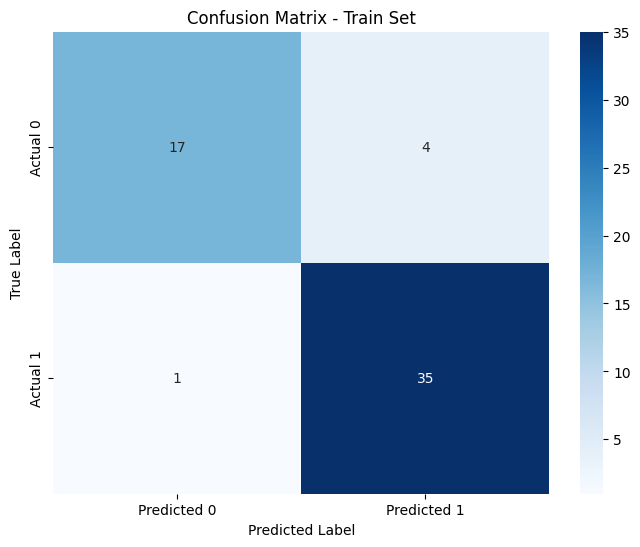

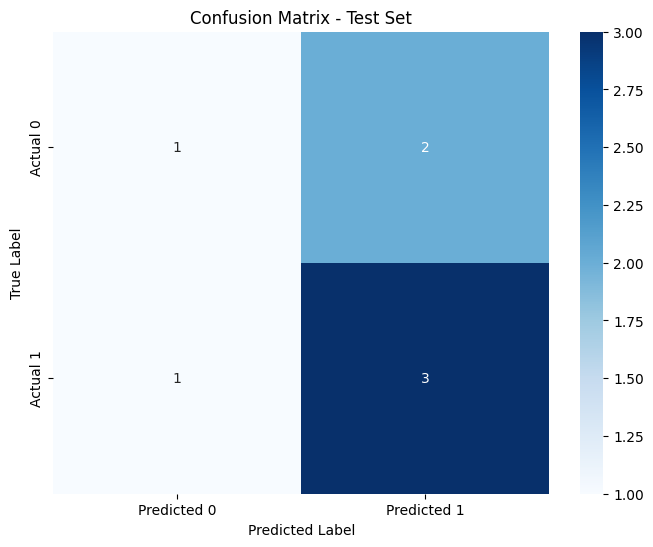

In [ ]:
# Calculate confusion matrix for train and test sets
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for train set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


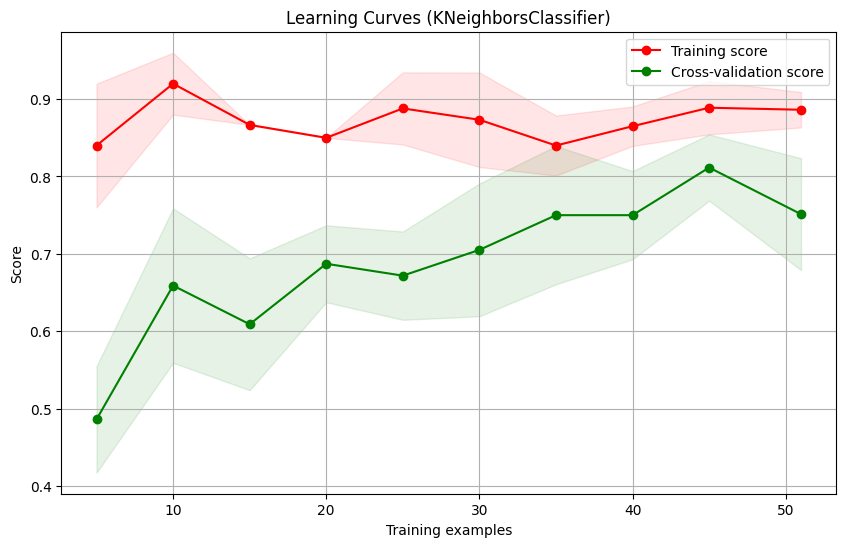

In [ ]:
# Define function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves for the model
plot_learning_curve(pipeline, X_data, y_data, "Learning Curves (KNeighborsClassifier)")
plt.show()
